In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [27]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [28]:
df.shape

(13320, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [30]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [31]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [32]:
df.isnull().sum() / df.shape[0] * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [33]:
df = df[df['size'].notna() & (df['size'] != 'nan')]

In [34]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [35]:
print(df.shape)

(13304, 9)


In [36]:
df  = df[df['size'].notna() & (df['size'] != 'nan')]
df['size'] = df['size'].astype('str')
df['Bedroom'] = df['size'].apply(lambda x : int(x.split(' ')[0]))
df.drop(['size'] , axis = 1  , inplace=True )
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,Bedroom
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2


In [37]:
df['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2110, dtype: int64

In [38]:
def deal_with(x) : 
    t = x.split('-') 
    if len(t) == 2  :
        return float( (float(t[0]) + float(t[1])) / 2)
    else : 
        try:
            return float(x)
        except:
            return None 
    

# def is_float(x): 
#     try :
#         float(x)
#     except: 
#         return False
#     return True 
#df[~df['total_sqft'].apply(lambda x : is_float(x))]['total_sqft'].unique()    

df['total_sqft'] = df['total_sqft'].apply(lambda x : deal_with(x))
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,Bedroom
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2


In [39]:
df.drop(axis=1,columns=['society','availability','area_type'] , inplace=True)
df.head()

,location,total_sqft,bath,balcony,price,Bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [40]:
df.dropna(inplace=True)
df.head()

,location,total_sqft,bath,balcony,price,Bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [41]:
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
Bedroom       0
dtype: int64

In [42]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df.head()

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [43]:
df['location'] = df['location'].apply(lambda x : x.strip())
locations = df.groupby('location')['location'].count().sort_values(ascending=False)
locations_less_or_equal_than10 = locations[locations <= 10]
df['location'] = df['location'].apply(lambda x : 'other' if x in locations_less_or_equal_than10 else x)
df.head()

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [44]:
def remove_outliers(name) : 
    value = df[name].sort_values(ascending=True)
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[name] >= lower_bound) & (df[name] <= upper_bound)]

All_value = []
for key , value in df.groupby('location'):
    tmp = df[df['location'] == key]
    value = tmp['price_per_sqft'].sort_values(ascending=True)
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    All_value.append(tmp[(tmp['price_per_sqft'] >= lower_bound) & (tmp['price_per_sqft'] <= upper_bound)])

df = pd.concat(All_value , axis = 0)
df.head()

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
848,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
1162,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,10416.666667
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
2355,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,18750.000000


In [45]:
df.shape

(11810, 7)

In [46]:
def plot_scatter_chart(df , location):
    bhk2 = df[(df['location'] == location) & (df['Bedroom'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['Bedroom'] == 3)]
    plt.figure(figsize=(15 , 10))
    plt.scatter(bhk2['price_per_sqft'] , bhk2['price'] , color = 'red'   , marker='+' , label = "2 BHK" , s = 50  )
    plt.scatter(bhk3['price_per_sqft'] , bhk3['price'] , color = 'green' , label = "3 BHK" , s = 50)
    plt.xlabel('price_per_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

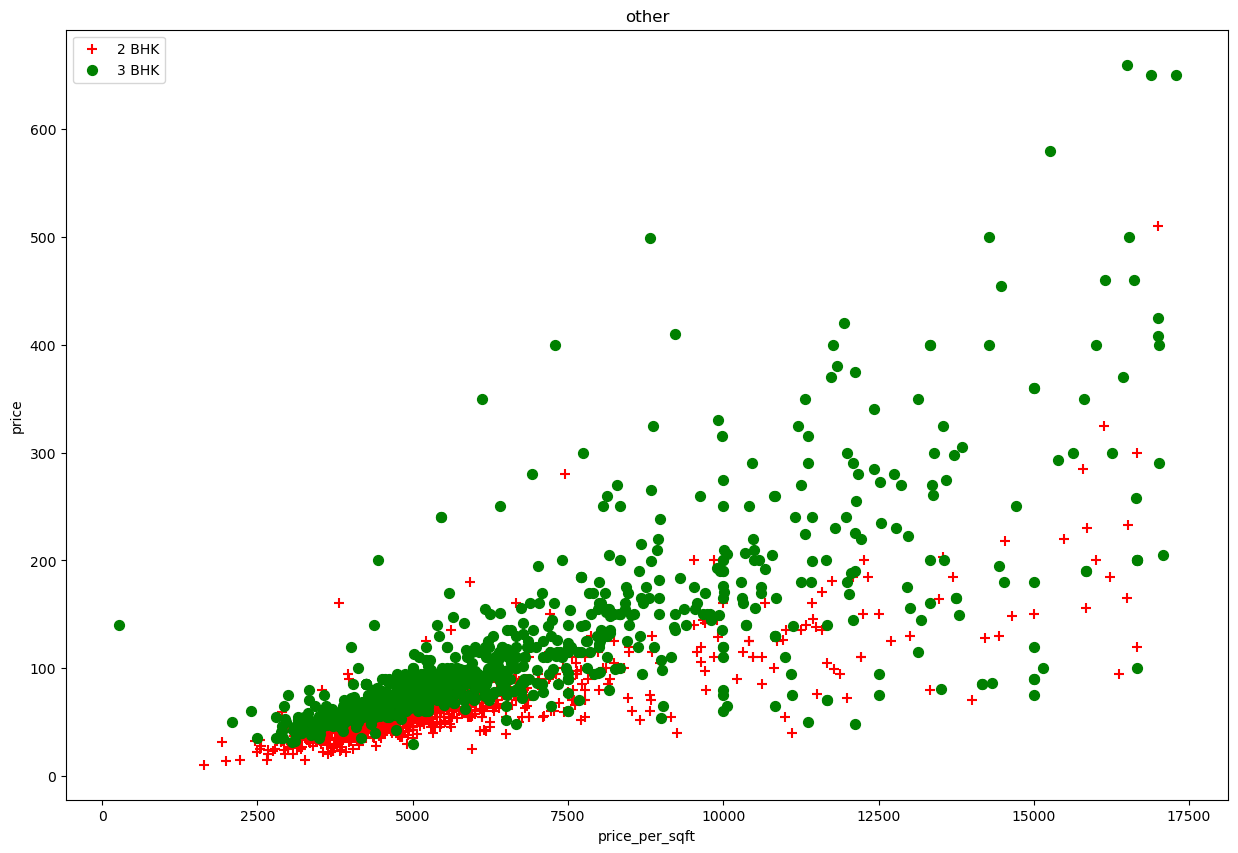

In [47]:
plot_scatter_chart(df , 'other')

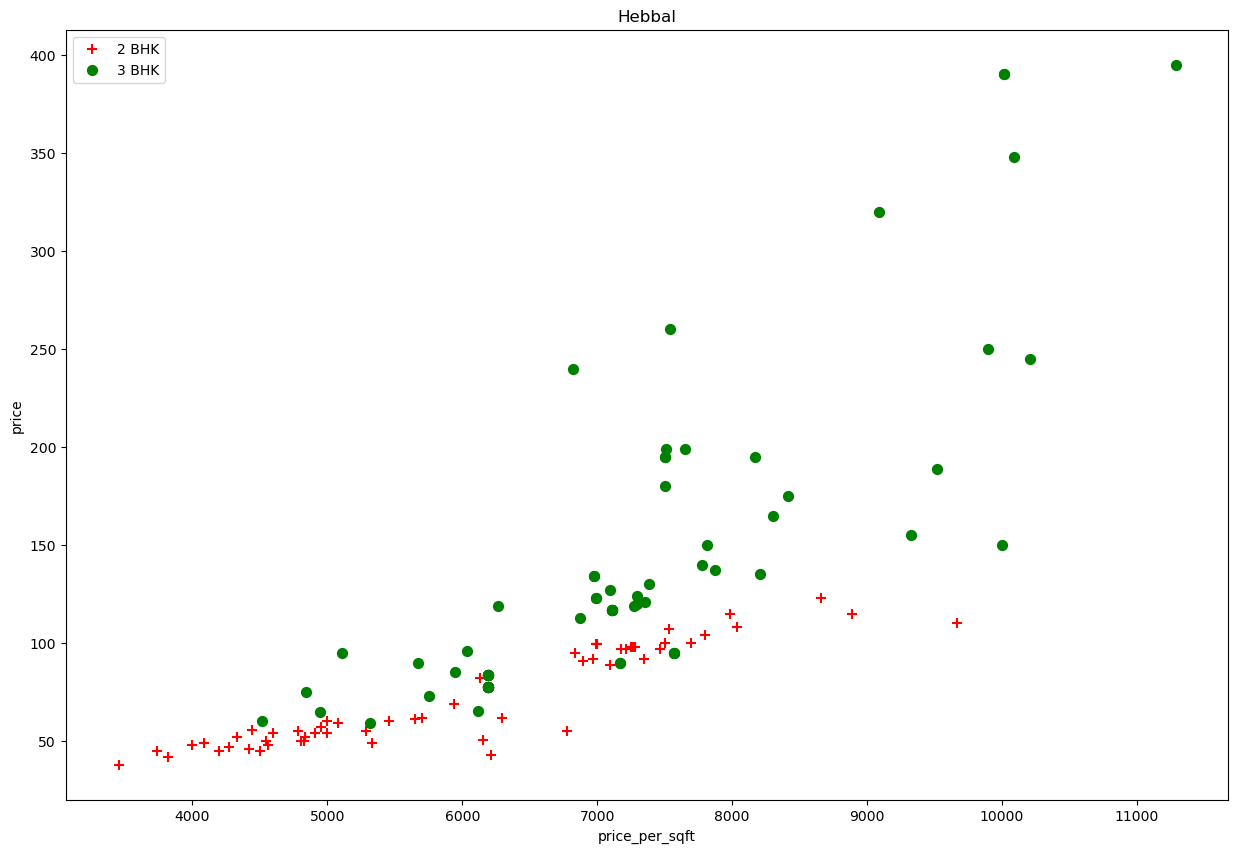

In [48]:
plot_scatter_chart(df,"Hebbal")

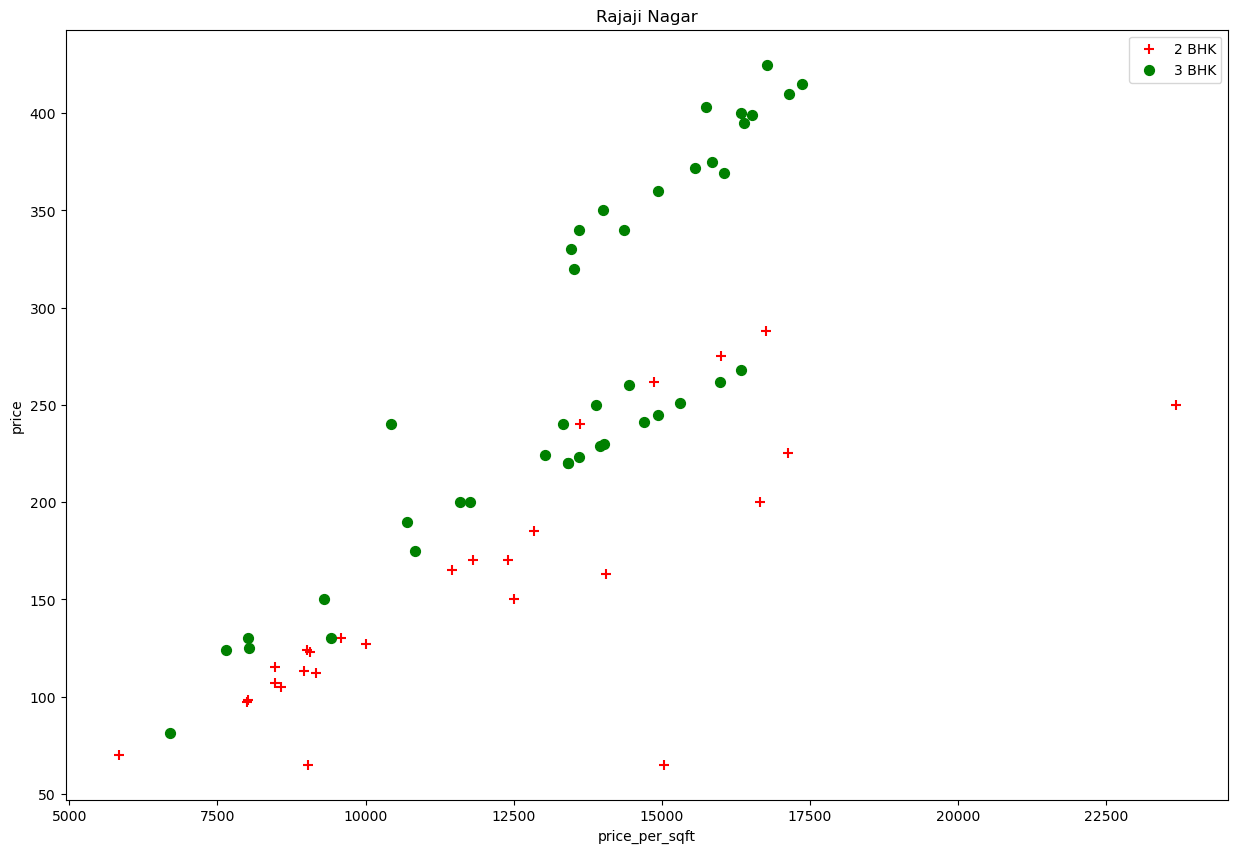

In [49]:
plot_scatter_chart(df,"Rajaji Nagar")

In [50]:
df.isnull().sum()

location          0
total_sqft        0
bath              0
balcony           0
price             0
Bedroom           0
price_per_sqft    0
dtype: int64

In [51]:
def remove_bhk_outliers(df) : 
    exclude_indices = np.array([])
    for location , dflocation in df.groupby('location') : 
        bhk_stats = {}
        for bhk , dfbhk in dflocation.groupby('Bedroom') : 
            bhk_stats[bhk] = {
                'mean': np.mean(dfbhk['price_per_sqft']),
                'std' : np.std(dfbhk['price_per_sqft']),
                'count' : dfbhk.shape[0]
            } 
        for bhk , dfbhk in dflocation.groupby('Bedroom') : 
            stats =  bhk_stats.get(bhk - 1)

            if stats and stats['count'] > 5 : 
                exclude_indices = np.append(exclude_indices ,  dfbhk[dfbhk['price_per_sqft'] < stats['mean']].index.values   )

    return df.drop(exclude_indices , axis = 'index')

df = remove_bhk_outliers(df)

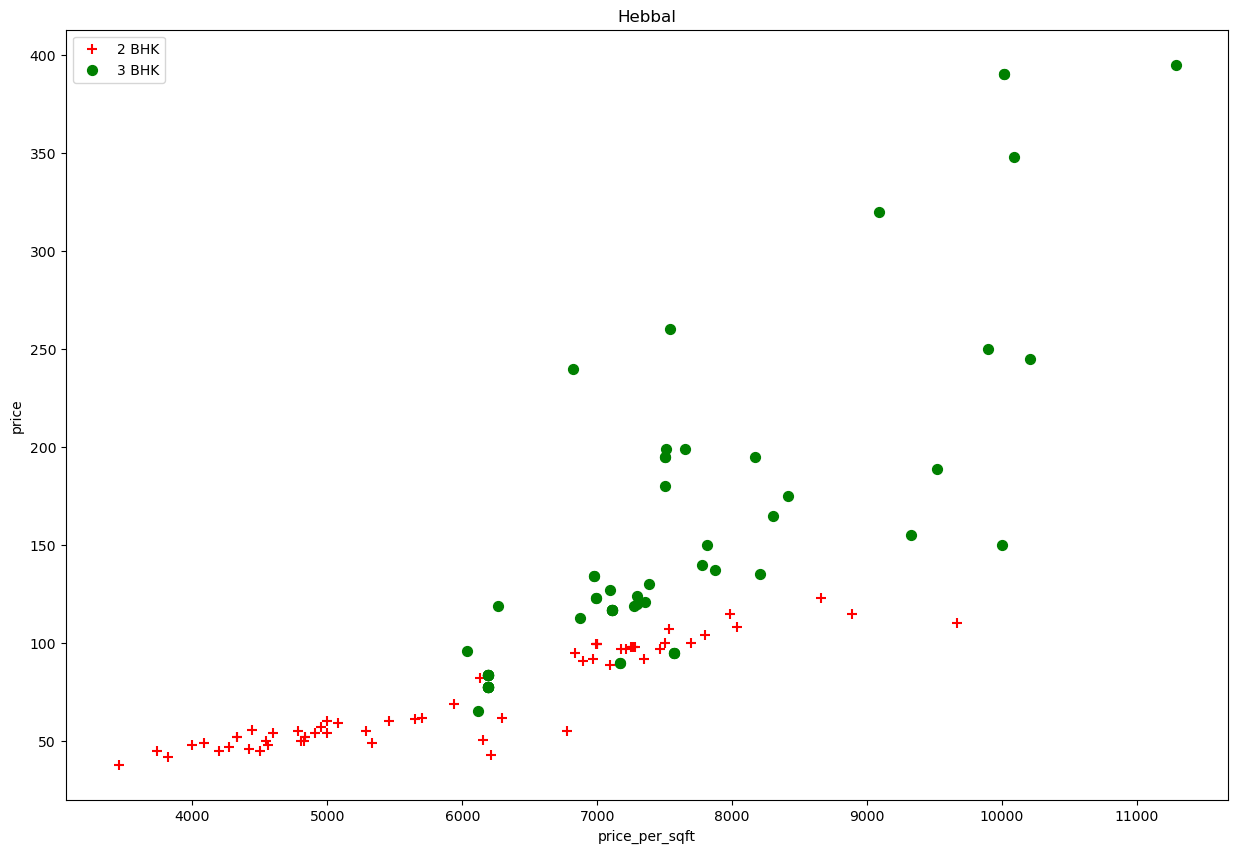

In [52]:
plot_scatter_chart(df,"Hebbal")

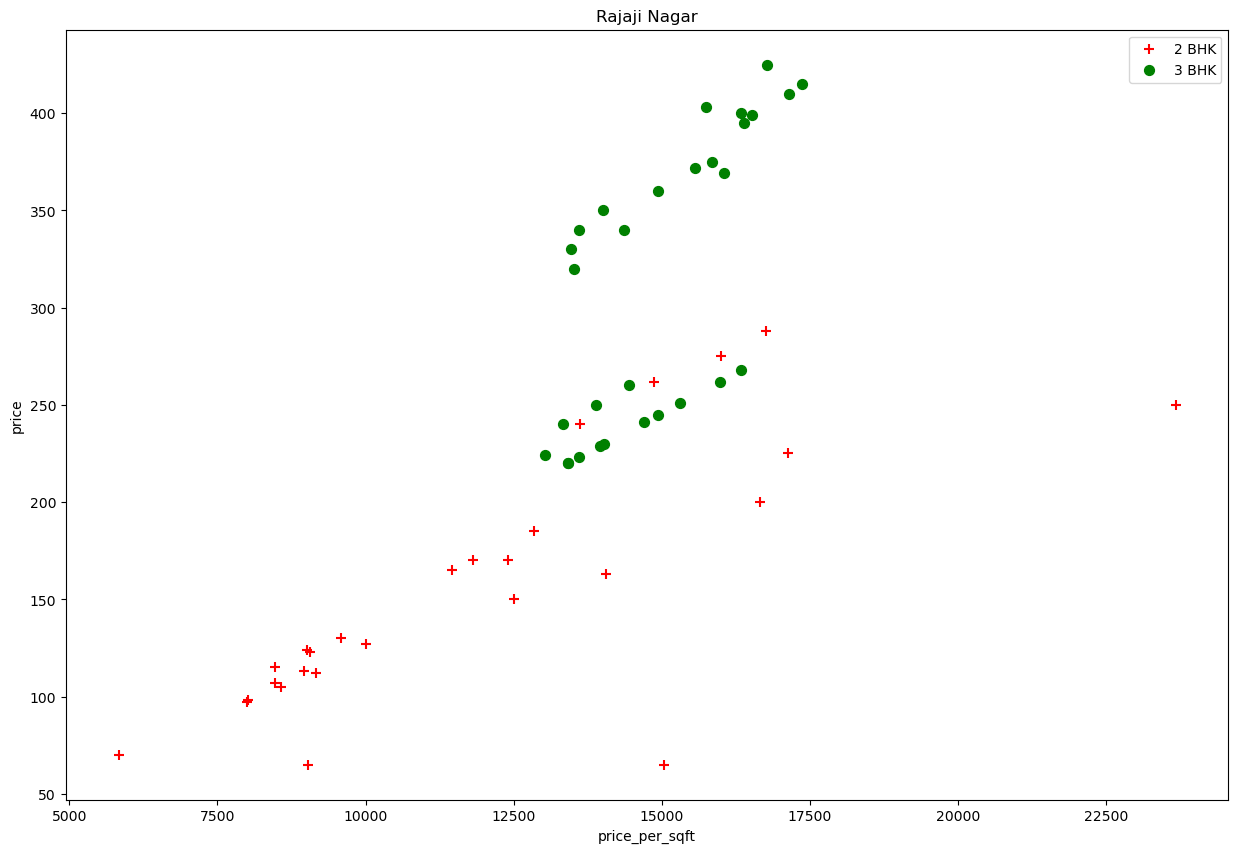

In [53]:
plot_scatter_chart(df,"Rajaji Nagar")

Text(0, 0.5, 'Count')

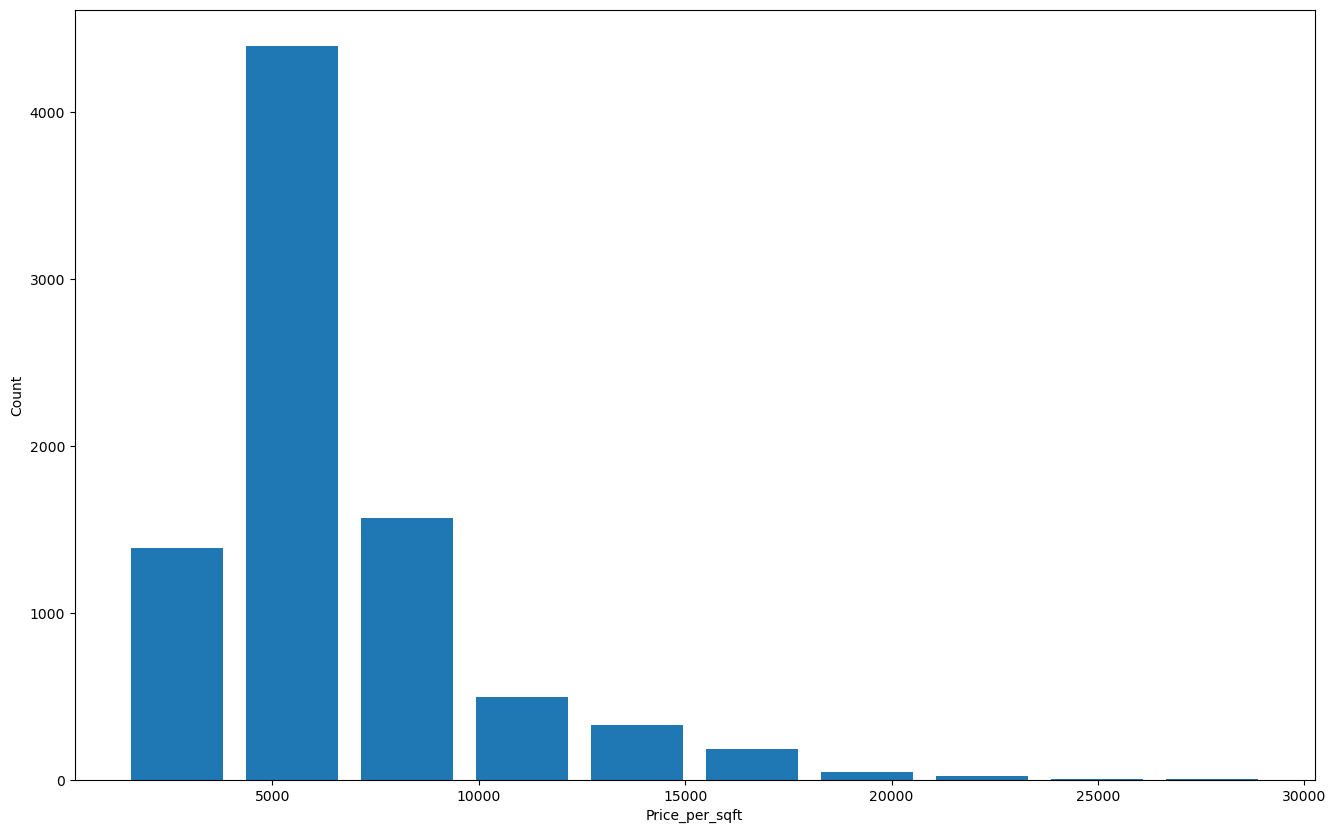

In [54]:
plt.figure(figsize=(16 , 10))
plt.hist(df['price_per_sqft'] , rwidth=0.8)
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')

In [55]:
df.isnull().sum()

location          0
total_sqft        0
bath              0
balcony           0
price             0
Bedroom           0
price_per_sqft    0
dtype: int64

In [56]:
dff = df 

In [57]:
df = dff

In [58]:
df = df.drop('price_per_sqft', axis = 1)

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Separate the numerical and categorical features
X_num = df.select_dtypes(exclude=['object'])
X_cat = df.select_dtypes(include=['object'])

# Create and configure the OneHotEncoder
# sparse_output=False returns a dense NumPy array instead of a sparse matrix
# handle_unknown='ignore' assigns a zero vector to unseen categories during transform
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical data (conventionally on the training data)
X_encoded = encoder.fit_transform(X_cat)

# Get the new column names (optional, but helpful for creating a DataFrame)
feature_names = encoder.get_feature_names_out(X_cat.columns)

# Create a DataFrame of the one-hot encoded features
one_hot_features = pd.DataFrame(X_encoded, columns=feature_names)

X_num = X_num.reset_index()
# Join the numerical features with the one-hot encoded features
df = pd.concat([X_num , one_hot_features] , axis=1).drop('index',axis = 1)

df.head()

,total_sqft,bath,balcony,price,Bedroom,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,2.0,194.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1200.0,6.0,2.0,125.0,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1875.0,2.0,3.0,235.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2400.0,4.0,2.0,450.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
X = df.drop(['price'] , axis = 1)
Y = df['price'] 

In [61]:
X.isnull().sum()

total_sqft                      0
bath                            0
balcony                         0
Bedroom                         0
location_1st Block Jayanagar    0
                               ..
location_Yelahanka              0
location_Yelahanka New Town     0
location_Yelenahalli            0
location_Yeshwanthpur           0
location_other                  0
Length: 240, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42 , shuffle=True)
clf = LinearRegression()
clf.fit(X_train , Y_train)
clf.score(X_test , Y_test)

0.7888747963148977

In [63]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 42)
cross_val_score(LinearRegression() , X , Y , cv = cv)

array([0.7888748 , 0.78335961, 0.77029886, 0.79559043, 0.77472917])

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

c:\Users\BS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BS\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\BS\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\BS\anaconda3\Lib\site-packages\sklearn\utils\_

,model,best_score,best_params
0,linear_regression,0.769492,{}
1,lasso,0.683705,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.739546,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [65]:
best_model = LinearRegression()
best_model.fit(X_train , Y_train)
best_model.score(X_test , Y_test)

0.7888747963148977

In [66]:
def predict_price(location,total_sqft, bath , balcony , Bedroom):    
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = Bedroom
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
    return best_model.predict([x])[0]

In [67]:
predict_price('location_1st Block Jayanagar' , 1000 , 3 , 4 , 3)

c:\Users\BS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


151.5494641833186

In [68]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(best_model,f)

In [69]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))